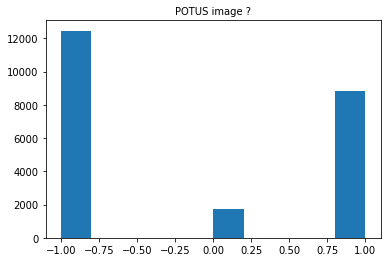

In [12]:
# Analyse des données du projet avec leurs polarités : tracé des polarités
#prédiction de polarité avec TextBlob sur les tweets collectés
import matplotlib.pyplot as plt
from joblib import dump, load
with open('group10_data@POTUS_projectdata.pickle', 'rb') as f1:  # load data
            liste = pickle.load(f1)
dico_pred = dict()
predict = list()
cl = load('classifier.pickle')
for d in liste: 
    p = cl.classify(normalisation(d['full_text']))
    if p=='pos':
        predict.append(1)
    elif p=='neg':
        predict.append(-1)
    else:
        predict.append(0)
dico_pred['predicted_polarity'] = predict      
liste.append(dico_pred)
plt.hist(predict)

plt.title('POTUS image ?', fontsize=10)

plt.savefig("plot_simple_histogramme_matplotlib_01.png")

plt.show()



In [10]:
# prétraitement champ texte
import unicodedata
import re
def normalisation(s):
    s = re.sub(r'http\S+', '', s) # supprime les liens de la chaine
    s = re.sub('[^a-zA-Z0-9\n\. ]', '', s)
    
    try:
        text = s.lower()
        text = unicode(text,'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore') # supprime les accents de la chaine
          
    return str(text, 'utf-8')

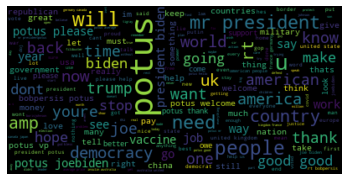

In [11]:
# statistiques d'utilisation des mots
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
with open('group10_data@POTUS_projectdata.pickle', 'rb') as f1:
    OL = pickle.load(f1)
text = ""
for d in OL:
    text = text + normalisation(d['full_text'])
            
wc = WordCloud(max_font_size=40).generate(text)
wc.to_file('output.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()